In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch

In [3]:
from gluonts.dataset.multivariate_grouper import MultivariateGrouper
from gluonts.dataset.repository.datasets import dataset_recipes, get_dataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import MultivariateEvaluator, aggregate_valid

from pts.modules import StudentTOutput

from TsT import TsTEstimator

/home/kashif/.env/pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/kashif/.env/pytorch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [4]:
dataset = get_dataset("electricity_nips", regenerate=False)
train_grouper = MultivariateGrouper(
    max_target_dim=int(dataset.metadata.feat_static_cat[0].cardinality)
)

test_grouper = MultivariateGrouper(
    num_test_dates=int(len(dataset.test) / len(dataset.train)),
    max_target_dim=int(dataset.metadata.feat_static_cat[0].cardinality),
)
dataset_train = train_grouper(dataset.train)
dataset_test = test_grouper(dataset.test)

In [17]:
estimator = TsTEstimator(
    # distr_output=StudentTOutput(dim=int(dataset.metadata.feat_static_cat[0].cardinality)),
    input_size=int(dataset.metadata.feat_static_cat[0].cardinality),
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length * 2,
    freq=dataset.metadata.freq,
    scaling="std",
    max_pool=False,
    depth=1,
    dim=64,
    norm_first=True,
    
    patch_size=(3, 3),
    batch_size=64,
    num_batches_per_epoch=100,
    trainer_kwargs=dict(accelerator="cuda", max_epochs=100,),
)

In [18]:
predictor = estimator.train(
    training_data=dataset_train,
    cache_data=True,
    #shuffle_buffer_length=1024,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type     | Params
-----------------------------------
0 | model | TsTModel | 152 K 
-----------------------------------
26.1 K    Trainable params
125 K     Non-trainable params
152 K     Total params
0.608     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Epoch 0, global step 100: 'train_loss' reached 5.18590 (best 5.18590), saving model to '/mnt/scratch/kashif/ConvTS-Mixer/lightning_logs/version_167/checkpoints/epoch=0-step=100.ckpt' as top 1
Epoch 1, global step 200: 'train_loss' reached 5.02745 (best 5.02745), saving model to '/mnt/scratch/kashif/ConvTS-Mixer/lightning_logs/version_167/checkpoints/epoch=1-step=200.ckpt' as top 1
Epoch 2, global step 300: 'train_loss' reached 4.80520 (best 4.80520), saving model to '/mnt/scratch/kashif/ConvTS-Mixer/lightning_logs/version_167/checkpoints/epoch=2-step=300.ckpt' as top 1
Epoch 3, global step 400: 'train_loss' reached 4.77273 (best 4.77273), saving model to '/mnt/scratch/kashif/ConvTS-Mixer/lightning_logs/version_167/checkpoints/epoch=3-step=400.ckpt' as top 1
Epoch 4, global step 500: 'train_loss' reached 4.76186 (best 4.76186), saving model to '/mnt/scratch/kashif/ConvTS-Mixer/lightning_logs/version_167/checkpoints/epoch=4-step=500.ckpt' as top 1
Epoch 5, global step 600: 'train_loss' r

In [19]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset_test, predictor=predictor, num_samples=100
)
forecasts = list(forecast_it)
targets = list(ts_it)

In [20]:
evaluator = MultivariateEvaluator(
    quantiles=(np.arange(20) / 20.0)[1:], target_agg_funcs={"sum": np.sum}
)
evaluator.aggregation_strategy = aggregate_valid

In [21]:
agg_metric, _ = evaluator(targets, forecasts, num_series=len(dataset_test))


Running evaluation: 7it [00:00, 73.39it/s]

Running evaluation: 7it [00:00, 113.48it/s]

Running evaluation: 7it [00:00, 111.65it/s]

Running evaluation: 7it [00:00, 112.08it/s]

Running evaluation: 7it [00:00, 113.57it/s]

Running evaluation: 7it [00:00, 114.37it/s]

Running evaluation: 7it [00:00, 113.77it/s]

Running evaluation: 7it [00:00, 114.18it/s]

Running evaluation: 7it [00:00, 112.22it/s]

Running evaluation: 7it [00:00, 102.99it/s]

Running evaluation: 7it [00:00, 113.26it/s]

Running evaluation: 7it [00:00, 113.60it/s]

Running evaluation: 7it [00:00, 113.38it/s]

Running evaluation: 7it [00:00, 113.41it/s]

Running evaluation: 7it [00:00, 114.05it/s]

Running evaluation: 7it [00:00, 114.25it/s]

Running evaluation: 7it [00:00, 114.37it/s]

Running evaluation: 7it [00:00, 114.11it/s]

Running evaluation: 7it [00:00, 114.02it/s]

Running evaluation: 7it [00:00, 114.15it/s]

Running evaluation: 7it [00:00, 114.22it/s]

Running evaluation: 7it [00:00, 114.00it/s]

Running ev

Running evaluation: 7it [00:00, 103.43it/s]

Running evaluation: 7it [00:00, 112.91it/s]

Running evaluation: 7it [00:00, 114.22it/s]

Running evaluation: 7it [00:00, 113.47it/s]

Running evaluation: 7it [00:00, 113.74it/s]

Running evaluation: 7it [00:00, 113.91it/s]

Running evaluation: 7it [00:00, 114.01it/s]

Running evaluation: 7it [00:00, 113.53it/s]

Running evaluation: 7it [00:00, 113.81it/s]

Running evaluation: 7it [00:00, 113.42it/s]

Running evaluation: 7it [00:00, 108.48it/s]

Running evaluation: 7it [00:00, 113.52it/s]

Running evaluation: 7it [00:00, 113.22it/s]

Running evaluation: 7it [00:00, 113.91it/s]

Running evaluation: 7it [00:00, 114.39it/s]

Running evaluation: 7it [00:00, 114.18it/s]

Running evaluation: 7it [00:00, 113.63it/s]

Running evaluation: 7it [00:00, 114.61it/s]

Running evaluation: 7it [00:00, 114.36it/s]

Running evaluation: 7it [00:00, 114.38it/s]

Running evaluation: 7it [00:00, 114.06it/s]

Running evaluation: 7it [00:00, 114.25it/s]

Running ev

Running evaluation: 7it [00:00, 113.83it/s]

Running evaluation: 7it [00:00, 114.03it/s]

Running evaluation: 7it [00:00, 114.11it/s]

Running evaluation: 7it [00:00, 113.93it/s]

Running evaluation: 7it [00:00, 114.10it/s]

Running evaluation: 7it [00:00, 114.84it/s]

Running evaluation: 7it [00:00, 113.79it/s]

Running evaluation: 7it [00:00, 113.60it/s]

Running evaluation: 7it [00:00, 114.18it/s]

Running evaluation: 7it [00:00, 113.99it/s]

Running evaluation: 7it [00:00, 113.82it/s]

Running evaluation: 7it [00:00, 111.79it/s]

Running evaluation: 7it [00:00, 106.73it/s]

Running evaluation: 7it [00:00, 110.70it/s]

Running evaluation: 7it [00:00, 112.80it/s]

Running evaluation: 7it [00:00, 114.01it/s]

Running evaluation: 7it [00:00, 114.41it/s]

Running evaluation: 7it [00:00, 114.07it/s]

Running evaluation: 7it [00:00, 114.99it/s]

Running evaluation: 7it [00:00, 114.26it/s]

Running evaluation: 7it [00:00, 114.23it/s]

Running evaluation: 7it [00:00, 114.54it/s]

Running ev

In [22]:
print("CRPS-Sum: {}".format(agg_metric["m_sum_mean_wQuantileLoss"]))
print("CRPS: {}".format(agg_metric["mean_wQuantileLoss"]))
print("QL50: {}".format(agg_metric["wQuantileLoss[0.5]"]))
print("QL90: {}".format(agg_metric["wQuantileLoss[0.9]"]))
print("MSIS: {}".format(agg_metric["MSIS"]))
print("NRMSE: {}".format(agg_metric["NRMSE"]))
print("sMAPE: {}".format(agg_metric["sMAPE"]))
print("MASE: {}".format(agg_metric["MASE"]))

# print("ND: {}".format(agg_metric["ND"]))
# print("NRMSE: {}".format(agg_metric["NRMSE"]))
# print("MSE: {}".format(agg_metric["MSE"]))

CRPS-Sum: 0.04306928500457883
CRPS: 0.09682826258475276
QL50: 0.1218843872698629
QL90: 0.06468114236337141
MSIS: 13.986752294746646
NRMSE: 1.2397042897305621
sMAPE: 0.19934942581795126
MASE: 1.6660368612194754


In [23]:
def plot(
    target,
    forecast,
    prediction_length,
    prediction_intervals=(50.0, 90.0),
    color="g",
    fname=None,
):
    label_prefix = ""
    rows = 4
    cols = 4
    fig, axs = plt.subplots(rows, cols, figsize=(24, 24))
    axx = axs.ravel()
    seq_len, target_dim = target.shape

    ps = [50.0] + [
        50.0 + f * c / 2.0 for c in prediction_intervals for f in [-1.0, +1.0]
    ]

    percentiles_sorted = sorted(set(ps))

    def alpha_for_percentile(p):
        return (p / 100.0) ** 0.3

    for dim in range(0, min(rows * cols, target_dim)):
        ax = axx[dim]

        target[-2 * prediction_length :][dim].plot(ax=ax)

        ps_data = [forecast.quantile(p / 100.0)[:, dim] for p in percentiles_sorted]
        i_p50 = len(percentiles_sorted) // 2

        p50_data = ps_data[i_p50]
        p50_series = pd.Series(data=p50_data, index=forecast.index)
        p50_series.plot(color=color, ls="-", label=f"{label_prefix}median", ax=ax)

        for i in range(len(percentiles_sorted) // 2):
            ptile = percentiles_sorted[i]
            alpha = alpha_for_percentile(ptile)
            ax.fill_between(
                forecast.index,
                ps_data[i],
                ps_data[-i - 1],
                facecolor=color,
                alpha=alpha,
                interpolate=True,
            )
            # Hack to create labels for the error intervals.
            # Doesn't actually plot anything, because we only pass a single data point
            pd.Series(data=p50_data[:1], index=forecast.index[:1]).plot(
                color=color,
                alpha=alpha,
                linewidth=10,
                label=f"{label_prefix}{100 - ptile * 2}%",
                ax=ax,
            )

    legend = ["observations", "median prediction"] + [
        f"{k}% prediction interval" for k in prediction_intervals
    ][::-1]
    axx[0].legend(legend, loc="upper left")

    if fname is not None:
        plt.savefig(fname, bbox_inches="tight", pad_inches=0.05)

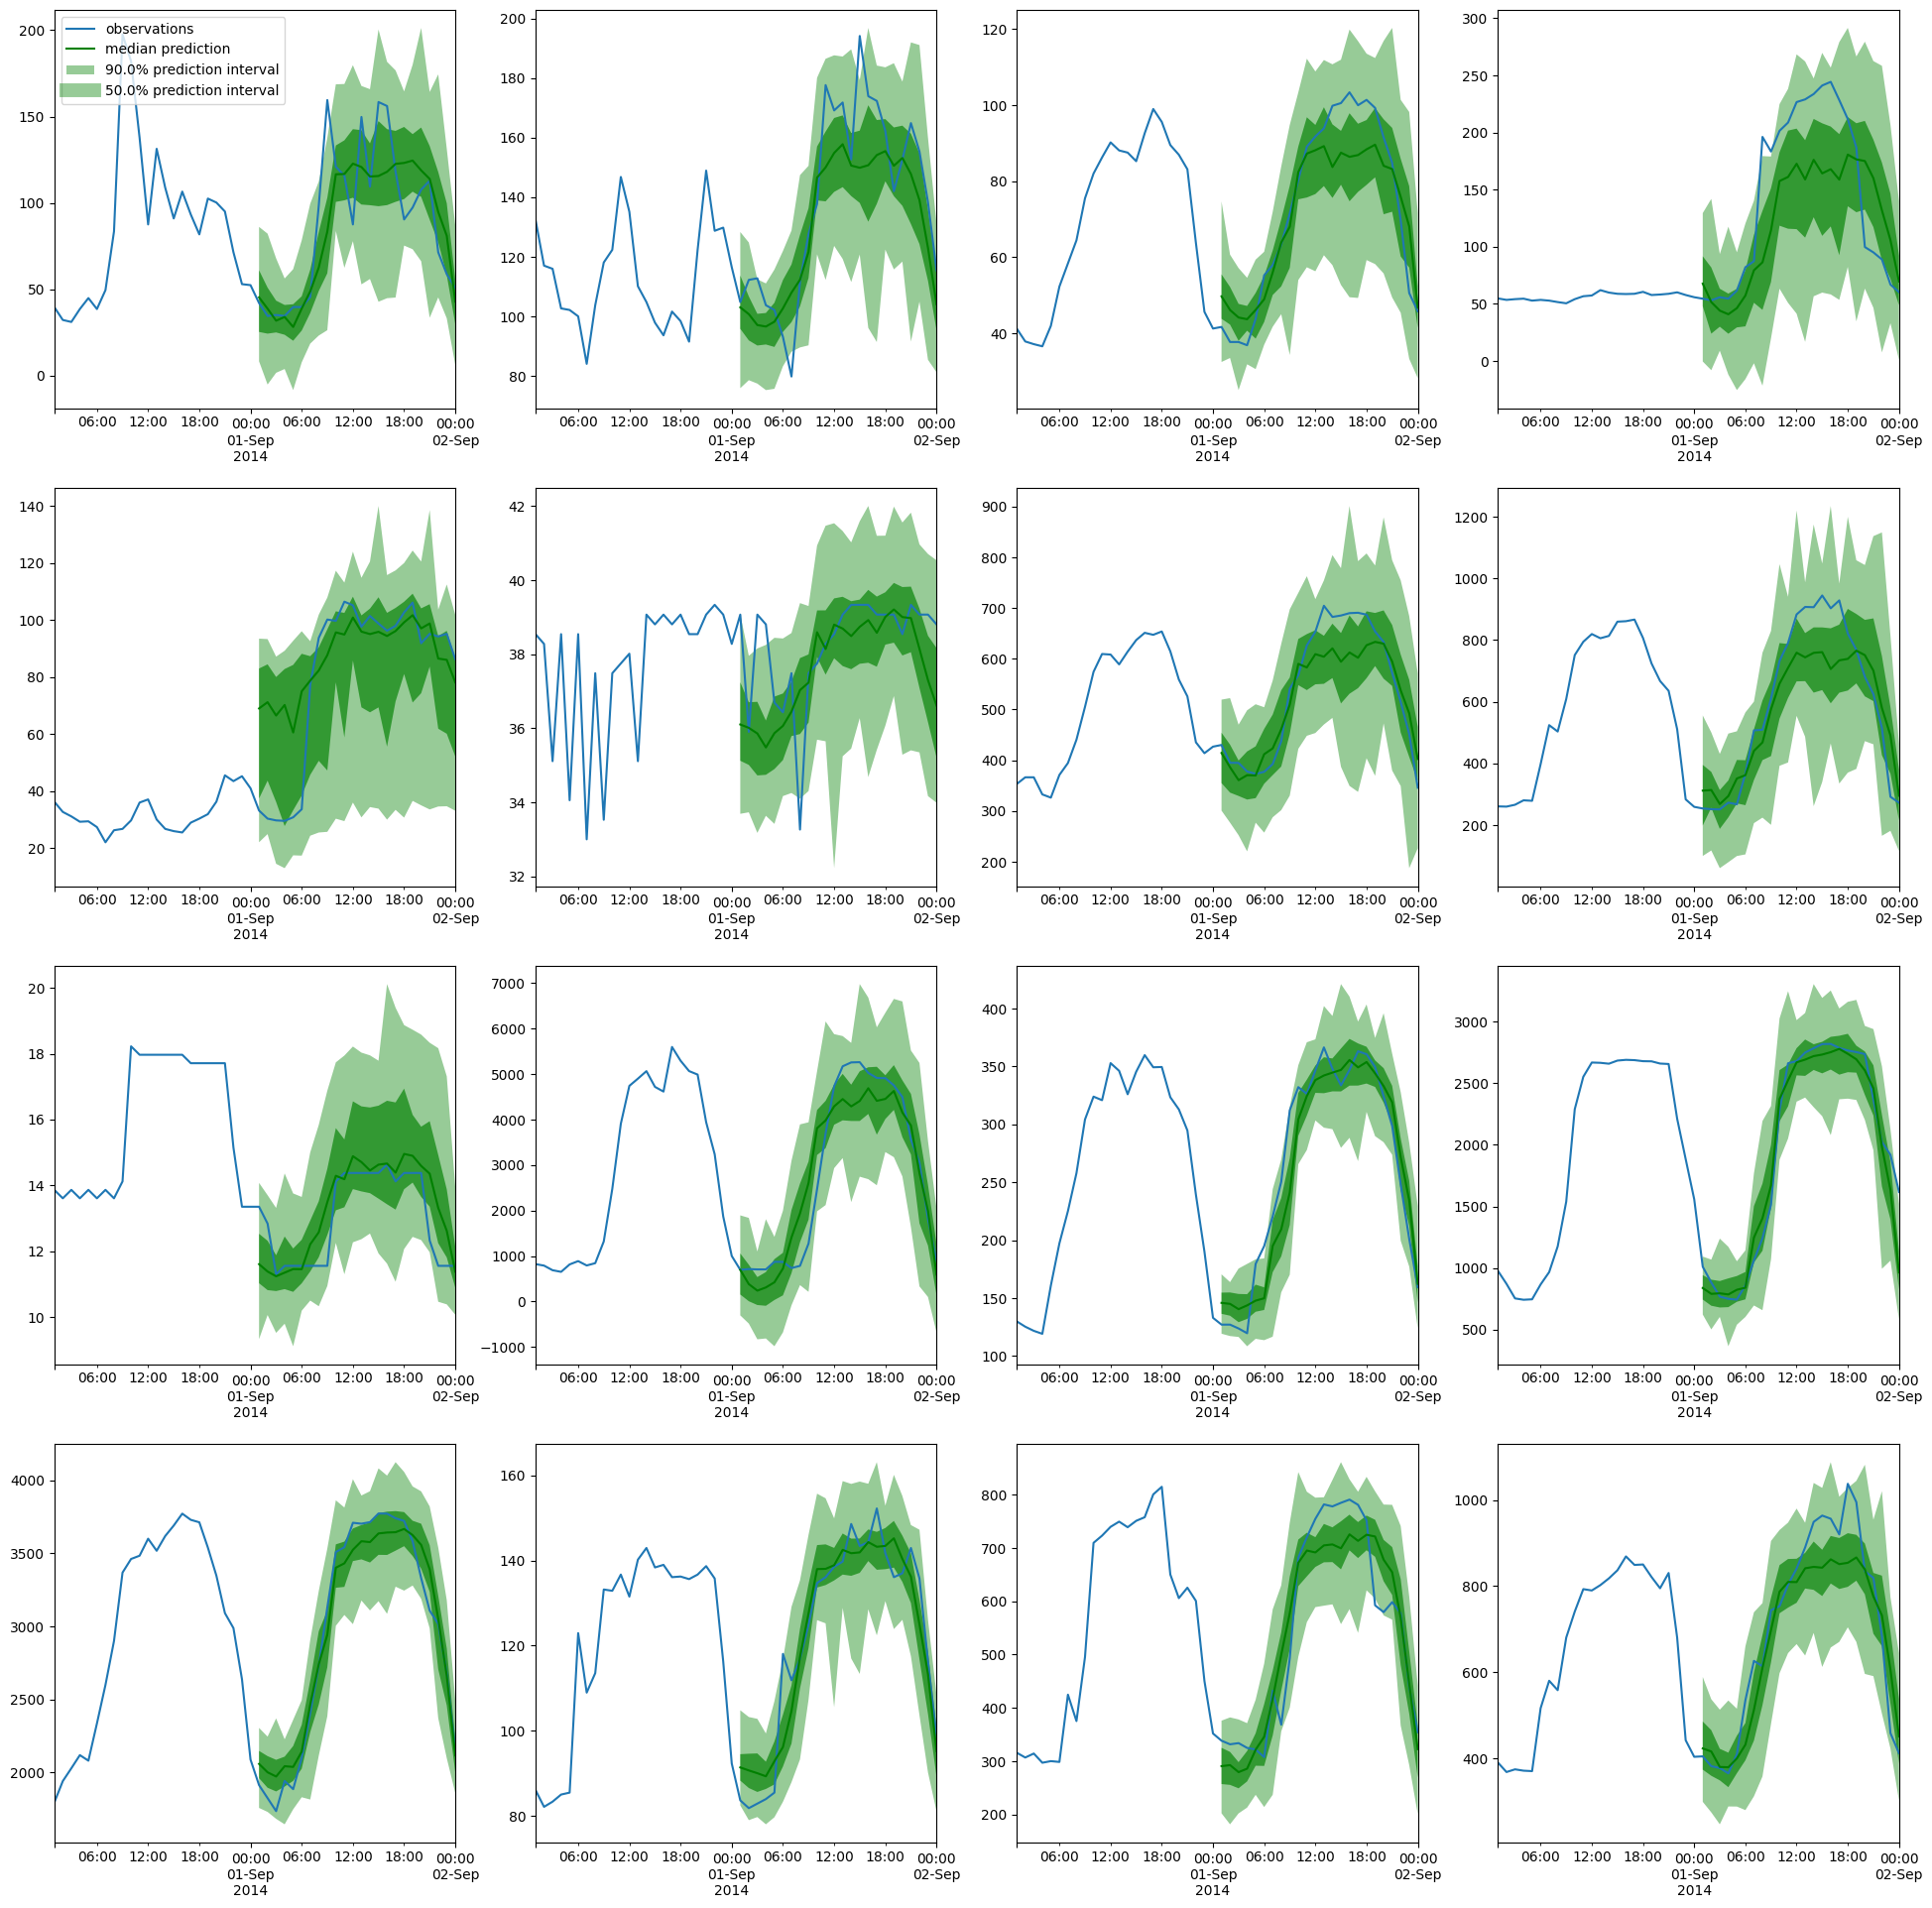

[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15
[rank: 0] Received SIGTERM: 15


In [24]:
plot(
    target=targets[0],
    forecast=forecasts[0],
    prediction_length=dataset.metadata.prediction_length,
)
plt.show()